In [1]:
import pandas as pd
df = pd.read_pickle("twitts")
df.index = [i for i in range(len(df))]


### Pre-processing tweets

–ü—Ä–æ–≤–µ—Å—Ç–∏ –æ–±—Ä–∞–±–æ—Ç–∫—É —Ç–µ–∫—Å—Ç–∞:

    -—É–¥–∞–ª–∏—Ç—å —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ 0
    -–Ω–∞–π—Ç–∏ –æ–±—Ä–∞—â–µ–Ω–∏—è –ø–æ @ –∏–ª–∏ —Ö—ç—à—Ç–µ–≥–∏
    -–Ω–∞–π—Ç–∏ —Å—Å—ã–ª–∫–∏ –Ω–∞ —Å–∞–π—Ç—ã
    -—Ä–∞–∑–±–∏—Ç—å –ø–æ —Å–ª–æ–≤–∞–º –∏ n-–≥—Ä–∞–º–º—ã


–í–æ–ø—Ä–æ—Å 1 –ó–∞—á–µ–º –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –Ω—É–∂–Ω—ã n-–≥—Ä–∞–º–º—ã?

In [2]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import time

start_time = time.time() 

tokenizer = TweetTokenizer()
tokenized_tweets = [tokenizer.tokenize(t) for t in df.text]

stop_words = stopwords.words("english")
stop_words.extend(["&amp;", "&gt;", "&lt;"])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

clean_text = []
handles = []
hashtags = []
carrier = []
links = []
# –ø—Ä–æ—Å—Ç–æ–π –ø—Ä–∏–º–µ—Ä pre-processing
for tweet in tokenized_tweets:

    thandles = []
    thashtags = []
    joined_words = " "
    words = [w.lower() for w in tweet if len(w)>2 and w not in stop_words]
    thandles = [w for w in words if re.search("^@\w+", w)]
    tlinks = [w for w in words if re.search("^https:\w+", w)]
#     print(tlinks)
    thashtags = [w for w in words if re.search("^#\w+", w)]
    words = [w for w in words if w.isalpha() and w not in thandles and w not in thashtags and w not in tlinks]
    words = [lemmatizer.lemmatize(w) for w in words]
    
    joined_words = joined_words.join(words)
    tlength = len(joined_words)
    handles.append(thandles)
    hashtags.append(thashtags)
    links.append(tlinks)
    clean_text.append(joined_words)

In [4]:
df['clean_text'] = clean_text
df['handles'] = handles
df['hashtags'] = hashtags
df['links'] = links
df.head()

screen_name           date_time           location  \
0       TheSkubis 2021-03-30 23:59:19  Pennsylvania, USA   
1  VerizonSupport 2021-03-30 23:56:55                      
2  VerizonSupport 2021-03-30 23:55:30                      
3      _carolinek 2021-03-30 23:55:24                      
4  VerizonSupport 2021-03-30 23:54:26                      

                                                text  \
0  @VerizonSupport I have issues with closed capt...   
1  @_carolinek This could be due to regional rest...   
2  @tvmurray We'll be happy to help with anything...   
3  @VerizonSupport Hi! I know you think you can h...   
4  @lam3014 We will be happy to look into this fo...   

                                          clean_text            handles  \
0  issue closed caption walking dead show display...  [@verizonsupport]   
1  this could due regional restriction have check...      [@_carolinek]   
2  happy help anything related fios twitter pleas...        [@tvmurray]   
3  know think help literally month trying help th...  [@verizonsupport]   
4  happy look please send direct message follow v...         [@lam3014]   

  hashtags links  
0       []    []  
1       []    []  
2       []    []  
3       []    []  
4       []    []

In [5]:
# n-grams
import nltk
# nltk.download('wordnet')
from nltk import ngrams
import collections as c
all_grams = []
for string in df.text:
    gram_2 = []
    for i in ngrams(string.split(),2):
#         print(i)
        gram_2.append(i)
    all_grams.append(gram_2)
df['all_grams'] = all_grams
df.head()

screen_name           date_time           location  \
0       TheSkubis 2021-03-30 23:59:19  Pennsylvania, USA   
1  VerizonSupport 2021-03-30 23:56:55                      
2  VerizonSupport 2021-03-30 23:55:30                      
3      _carolinek 2021-03-30 23:55:24                      
4  VerizonSupport 2021-03-30 23:54:26                      

                                                text  \
0  @VerizonSupport I have issues with closed capt...   
1  @_carolinek This could be due to regional rest...   
2  @tvmurray We'll be happy to help with anything...   
3  @VerizonSupport Hi! I know you think you can h...   
4  @lam3014 We will be happy to look into this fo...   

                                          clean_text            handles  \
0  issue closed caption walking dead show display...  [@verizonsupport]   
1  this could due regional restriction have check...      [@_carolinek]   
2  happy help anything related fios twitter pleas...        [@tvmurray]   
3  know think help literally month trying help th...  [@verizonsupport]   
4  happy look please send direct message follow v...         [@lam3014]   

  hashtags links                                          all_grams  
0       []    []  [(@VerizonSupport, I), (I, have), (have, issue...  
1       []    []  [(@_carolinek, This), (This, could), (could, b...  
2       []    []  [(@tvmurray, We'll), (We'll, be), (be, happy),...  
3       []    []  [(@VerizonSupport, Hi!), (Hi!, I), (I, know), ...  
4       []    []  [(@lam3014, We), (We, will), (will, be), (be, ...

### –†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ —Å–µ–≥–º–µ–Ω—Ç–æ–≤

### –í–æ–ø—Ä–æ—Å 1. - –∫–∞–∫–∏–µ –µ—â–µ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–µ–≥–º–µ–Ω—Ç—ã?

*–î–æ–±–∞–≤–∏–ª —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å

https://core.ac.uk/download/pdf/82425196.pdf

In [ ]:
# pip install textblob

In [6]:

# –∏–∑—É—á–∏—Ç—å textblob
# https://textblob.readthedocs.io/en/dev/

from textblob import TextBlob
polarity = [0.0]*len(df)
subjectivity = [0.5]*len(df)
sentiment = [""]*len(df)
fact = [""]*len(df)
for i in df.index:
#     print(df.clean_text[i])
    blob = TextBlob(str(df.clean_text[i]))
    polarity[i] = blob.polarity
    subjectivity[i] = blob.subjectivity
    
#     # —Ä–∞–∑–±–∏–≤–∫–∏ –Ω–∞ —Å–µ–≥–º–µ–Ω—Ç—ã 
#     # –∞ –∫–∞–∫–∏–µ —Å–ø–æ—Å–æ–±—ã —Ç—ã –∑–Ω–∞–µ—à—å –µ—â—ë?
    if polarity[i] > 0.0:
        sentiment[i] = "pos"
    elif polarity[i] < 0.0:
        sentiment[i] = "neg"
    else:
        sentiment[i] = "neu"
        
    if subjectivity[i] > 0.5:
        fact[i] = 0
    else:
        fact[i] = 1
    
df["sentiment"]    = sentiment
df["polarity"]     = polarity
df["subjectivity"] = subjectivity
df['fact'] = fact

### –í–æ–ø—Ä–æ—Å 2. - –Ω—É–∂–µ–Ω –ª–∏ emoji analysis???

  -https://pypi.org/project/emosent-py/
  
  -https://github.com/ajinkyachavan/Emoticon-Based-Sentiment-Analysis-Python/blob/master/emoticon-based-sentiment-analysis-of-twitter-data.pdf

In [7]:
emoji = []
for i in df.text:
    emo = re.findall(r'[^\w\s,-@\'\^‚Ä¶‚Äô!#$)(+*‚Äú&‚Äù~|%]',i)
    emoji.append(emo)
df['emoji'] = emoji


### –°–¥–µ–ª–∞–µ–º —Ä–∞–∑–±–∏–≤–∫—É –ø–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º



###  –í–æ–ø—Ä–æ—Å 3. –í —á–µ–º —Å–º—ã—Å–ª —ç—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–∏, –µ—Å–ª–∏ –º—ã –∑–∞–≥—Ä—É–∂–∞–ª–∏ –¥–∞–Ω–Ω—ã–µ —á–µ—Ä–µ–∑ tweepy  –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –ø–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º?

In [60]:
# —Å–æ–∑–¥–∞–¥–∏–º –∫–æ–ª–æ–Ω–∫—É, –∫–æ—Ç–æ—Ä–∞—è —É–∫–∞–∂–µ—Ç, –∫–∞–∫–æ–π —ç—Ç–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä

# def carrier(df,name):
#     carrier = []

#     for text in df[['screen_name','text']].values:
#         screen_name = text[0].lower()
#         twitter_text = text[1].lower()
#         current_carrier = []
#         if name.lower() in twitter_text or name.lower() in screen_name:
#             current_carrier.append(name)

#         ... 
#         carrier.append(' '.join(current_carrier))
#     df['carrier'] = carrier
#     return df



In [8]:
carrier = []
def carrier (df,name):
    for text in df[['screen_name','text']].values:
        screen_name = text[0].lower()
        twitter_text = text[1].lower()
        current_carrier = []
        if name.lower() in twitter_text or name.lower() in screen_name:
            df.loc[df[df['text'] == text[1]].index,'carrier'] = name
    return df

# df = carrier(df,'VZWSupport')
# df.head()

In [9]:
car = ['verizon','VerizonSupport','VZWSupport','ATT','ATTHelp','TMobile','TMobileHelp']
for i in car:
    df = carrier(df,i)
#     print(df['carrier'].unique())

###  –í–æ–ø—Ä–æ—Å 4.–∑–∞—á–µ–º —ç—Ç–∞ —á–∞—Å—Ç—å –∫–æ–¥–∞ - —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä –¥–µ–ª–∞–ª–∏ –≤—ã—à–µ?

In [ ]:
# —Å–¥–µ–ª–∞–π –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å —Ç–æ–∫–∏–Ω–∞–π–∑–µ—Ä
# https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BA%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7
# https://docs.python.org/3/library/tokenize.html

# tokenized_tweets = [tokenizer.tokenize(t) for t in df.text]
# clf_text = []
# for tweet in tokenized_tweets:
#     joined_words = " "
#     words = [w.lower() for w in tweet if w.isalpha() or w[0]=='@']
#     tlinks = [w for w in words if re.search("^https:\w+", w)]
#     words = [w for w in words if  w not in tlinks]
#     joined_words = joined_words.join(words)
#     clf_text.append(joined_words)

# df["clf_text"] = clf_text

### –°–¥–µ–ª–∞–π –æ–±–∑–æ—Ä –ø–æ –≥—Ä—É–ø–ø–∞–º (EDA)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [11]:
clean_df = df[~df['carrier'].isna()][['carrier','location','date_time','clean_text','sentiment','fact','emoji']]
clean_df

carrier           location           date_time  \
0    VerizonSupport  Pennsylvania, USA 2021-03-30 23:59:19   
1    VerizonSupport                    2021-03-30 23:56:55   
2    VerizonSupport                    2021-03-30 23:55:30   
3    VerizonSupport                    2021-03-30 23:55:24   
4    VerizonSupport                    2021-03-30 23:54:26   
..              ...                ...                 ...   
695     TMobileHelp            Erie PA 2021-03-30 22:40:49   
696     TMobileHelp       Bellevue, WA 2021-03-30 22:40:01   
697     TMobileHelp       Bellevue, WA 2021-03-30 22:39:22   
698     TMobileHelp       Bellevue, WA 2021-03-30 22:36:19   
699     TMobileHelp       Bellevue, WA 2021-03-30 22:35:28   

                                            clean_text sentiment  fact emoji  
0    issue closed caption walking dead show display...       neg     1    []  
1    this could due regional restriction have check...       neg     1    []  
2    happy help anything related fios twitter pleas...       pos     0    []  
3    know think help literally month trying help th...       neu     1    []  
4    happy look please send direct message follow v...       pos     0    []  
..                                                 ...       ...   ...   ...  
695                          line though and referring       neu     1    []  
696  hey experience super important want make sure ...       pos     0    []  
697  thank reaching today ryan the essential plan a...       neu     1    []  
698  committed providing reliable service need stay...       neu     1    []  
699         hey berkley experience want goal make sure       pos     0    []  

[649 rows x 7 columns]

In [12]:
# –¥–æ–±–∞–≤–∏–º –º–µ—Å—è—Ü,—á–∞—Å,dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—É—é sentiment –∏ –¥–ª–∏–Ω—É —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è

import datetime as dt
clean_df['month'] = clean_df['date_time'].dt.month
clean_df['hour'] = clean_df['date_time'].dt.hour
clean_df['sense_dummy'] = clean_df['sentiment'].apply(lambda x: 1 if x == 'pos' else (0 if x == 'neu' else -1))
clean_df['text_len'] = clean_df['clean_text'].apply(lambda x:len(x))
clean_df.drop('sentiment',inplace = True,axis = 1)
clean_df['len_emoji'] = clean_df['emoji'].apply(lambda x:len(x))
clean_df['day'] = df['date_time'].dt.weekday
clean_df.head(3)

carrier           location           date_time  \
0  VerizonSupport  Pennsylvania, USA 2021-03-30 23:59:19   
1  VerizonSupport                    2021-03-30 23:56:55   
2  VerizonSupport                    2021-03-30 23:55:30   

                                          clean_text  fact emoji  month  hour  \
0  issue closed caption walking dead show display...     1    []      3    23   
1  this could due regional restriction have check...     1    []      3    23   
2  happy help anything related fios twitter pleas...     0    []      3    23   

   sense_dummy  text_len  len_emoji  day  
0           -1        51          0    1  
1           -1        52          0    1  
2            1        63          0    1

In [13]:
clean_df.describe()


fact  month        hour  sense_dummy    text_len   len_emoji  \
count  649.000000  649.0  649.000000   649.000000  649.000000  649.000000   
mean     0.704160    3.0   22.306626     0.229584   46.661017    0.280431   
std      0.456771    0.0    1.031885     0.676766   19.779004    1.163330   
min      0.000000    3.0   19.000000    -1.000000    0.000000    0.000000   
25%      0.000000    3.0   22.000000     0.000000   37.000000    0.000000   
50%      1.000000    3.0   23.000000     0.000000   48.000000    0.000000   
75%      1.000000    3.0   23.000000     1.000000   60.000000    0.000000   
max      1.000000    3.0   23.000000     1.000000  106.000000   14.000000   

         day  
count  649.0  
mean     1.0  
std      0.0  
min      1.0  
25%      1.0  
50%      1.0  
75%      1.0  
max      1.0

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 699
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   carrier      649 non-null    object        
 1   location     649 non-null    object        
 2   date_time    649 non-null    datetime64[ns]
 3   clean_text   649 non-null    object        
 4   fact         649 non-null    int64         
 5   emoji        649 non-null    object        
 6   month        649 non-null    int64         
 7   hour         649 non-null    int64         
 8   sense_dummy  649 non-null    int64         
 9   text_len     649 non-null    int64         
 10  len_emoji    649 non-null    int64         
 11  day          649 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 65.9+ KB


In [15]:
# –æ–ø–∏—Å–∞–Ω–∏–µ –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∏ count
clean_df.groupby('carrier').agg(['count','mean'])

fact           month       hour            sense_dummy  \
               count      mean count mean count       mean       count   
carrier                                                                  
ATT               93  0.709677    93    3    93  22.623656          93   
ATTHelp           98  0.846939    98    3    98  21.459184          98   
TMobile           96  0.875000    96    3    96  22.927083          96   
TMobileHelp      110  0.518182   110    3   110  22.718182         110   
VZWSupport        96  0.614583    96    3    96  21.614583          96   
VerizonSupport    88  0.613636    88    3    88  21.943182          88   
verizon           68  0.794118    68    3    68  23.000000          68   

                         text_len            len_emoji             day       
                    mean    count       mean     count      mean count mean  
carrier                                                                      
ATT             0.236559       93  40.129032        93  0.548387    93    1  
ATTHelp         0.132653       98  52.418367        98  0.030612    98    1  
TMobile         0.208333       96  41.572917        96  0.625000    96    1  
TMobileHelp     0.363636      110  47.972727       110  0.163636   110    1  
VZWSupport      0.229167       96  47.760417        96  0.010417    96    1  
VerizonSupport  0.261364       88  45.670455        88  0.068182    88    1  
verizon         0.132353       68  52.088235        68  0.632353    68    1

(array([ 88.,  93.,   0.,  96.,   0.,  68.,  96.,   0., 110.,  98.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

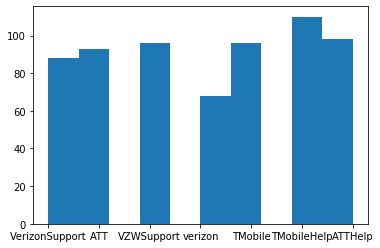

In [16]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –≤ –¥—Ñ
plt.hist(clean_df['carrier'],align = 'mid')

In [17]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞–º
clean_df.groupby('sense_dummy')['carrier'].agg('count')

sense_dummy
-1     91
 0    318
 1    240
Name: carrier, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020434646188>,
      dtype=object)

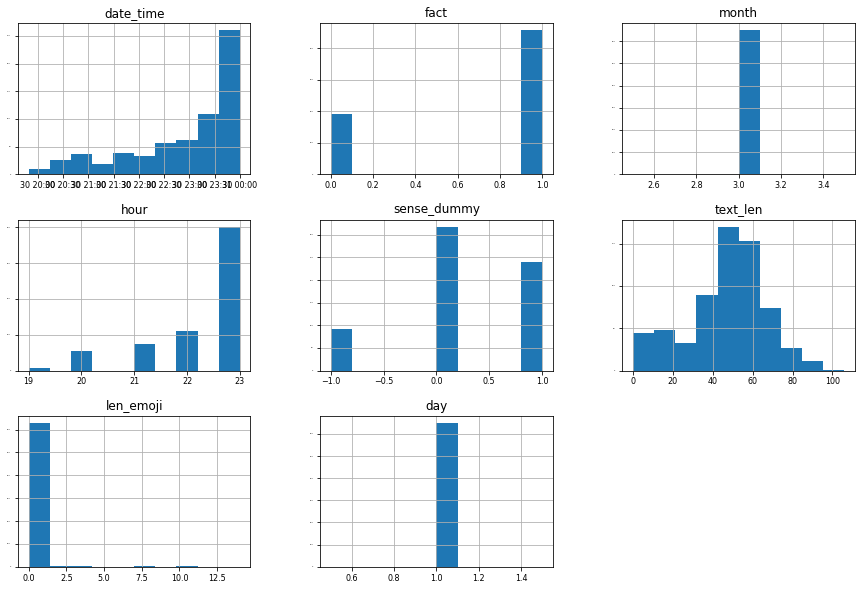

In [18]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Å–µ—Ö —á–∏—Å–ª–æ–≤—ã—Ö —Ñ–∏—á–µ–π

clean_df.hist(figsize=(15, 10), bins=10, xlabelsize=8, ylabelsize=2)

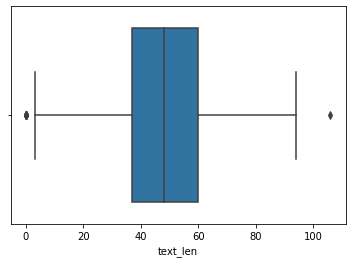

In [19]:
# –±–æ–∫—Å–ø–ª–æ—Ç –ø–æ –¥–ª–∏–Ω–µ —Å–ª–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ
sns.boxplot(clean_df['text_len'])

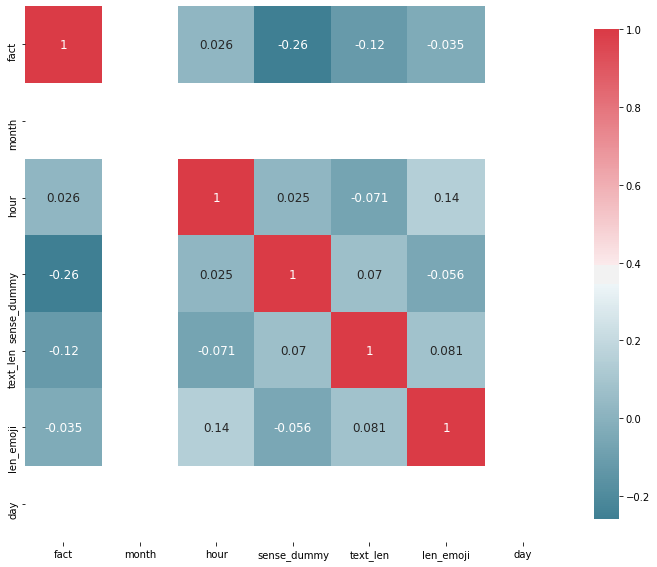

In [21]:
# heatmap - —Å –ª–µ–∫—Ü–∏–∏ –ø–æ numpy
# –≤—ã–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è heatmap –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
cor_col=['fact','month','hour','text_len','len_emoji','day']
target = clean_df['sense_dummy']

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map( clean_df )

### –û–ø—Ä–µ–¥–µ–ª–∏, –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ –Ω–∞–∏–±–æ–ª–µ–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤

  * –∫–∞–∫–∏–µ c–ª–æ–≤–∞ —á–∞—â–µ, —á–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞

In [101]:
# —Ñ—É–Ω–∫—Ü–∏—è –ø–æ–¥—Å—á–µ—Ç–∞ —Å–ª–æ–≤ –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞

from collections import Counter


# car = 'VerizonSupport'
# carrier_corpus = []
# for t  in clean_df[clean_df['carrier']== car]['clean_text']:
#     for j in t.split():
#         carrier_corpus.append(j)
        
# total_term_frequency = Counter(carrier_corpus)
# for word, freq in total_term_frequency.most_common(10):
#     word_dist = {}
#     word_dist[word] = freq
# #     print("{}\t{}".format(word, freq))
#     plt.bar(word_dist.keys(), word_dist.values(), color='g')
car = 'VerizonSupport'
def word_frequency_bar(clean_df,carrier_name):
    carrier_corpus = []
    for t  in clean_df[clean_df['carrier']== carrier_name]['clean_text']:
        for j in t.split():
            carrier_corpus.append(j)

    total_term_frequency = Counter(carrier_corpus)
    word_dist = {}
    for word, freq in total_term_frequency.most_common(10):
        word_dist[word] = freq
#         print ("{}\t{}".format(word, freq))
        plt.bar(word_dist.keys(), word_dist.values(), color='g')

# word_frequency_bar(clean_df,car)


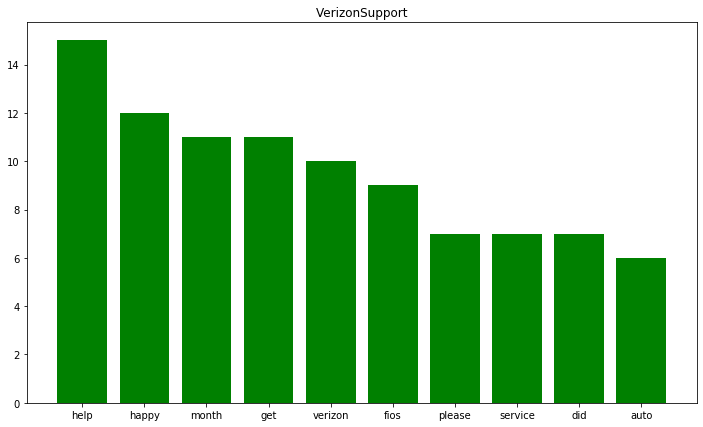

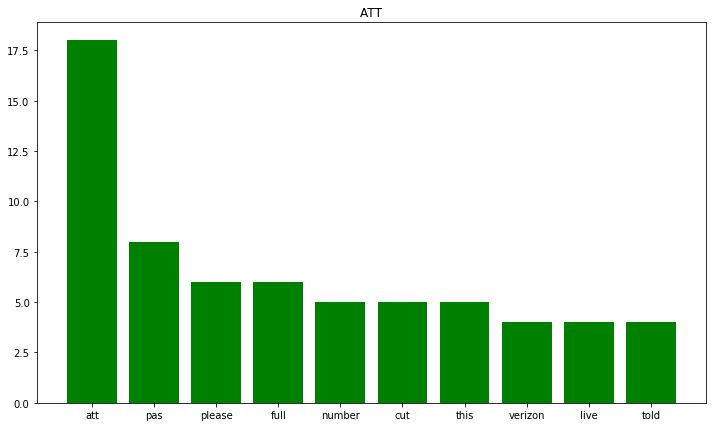

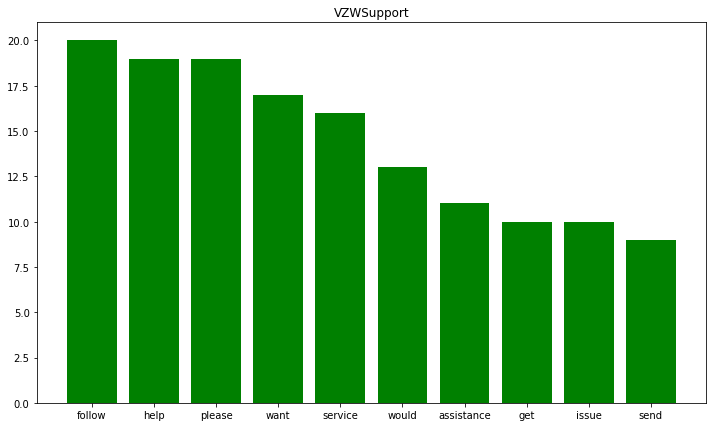

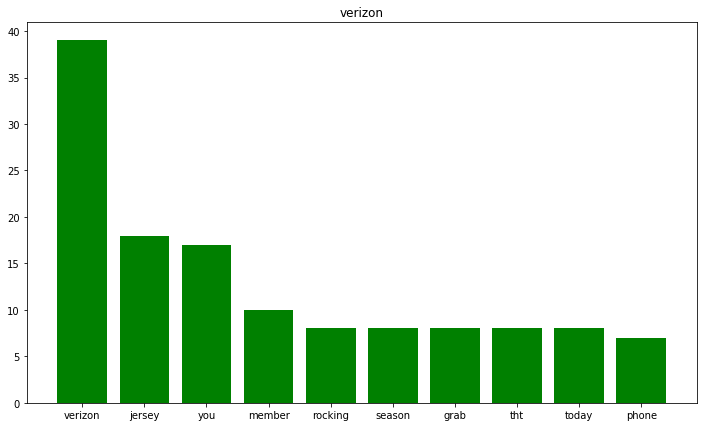

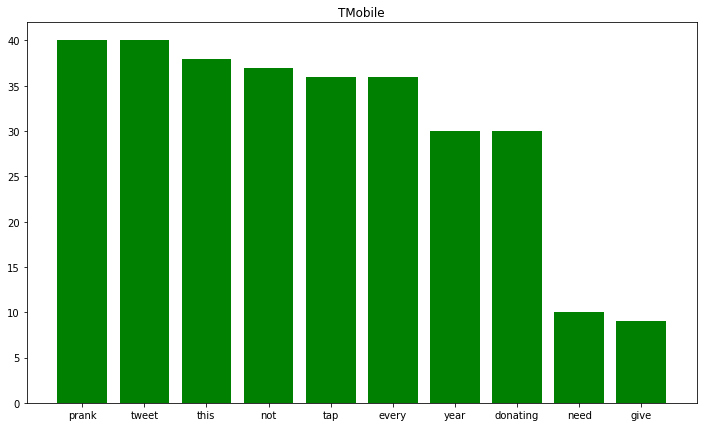

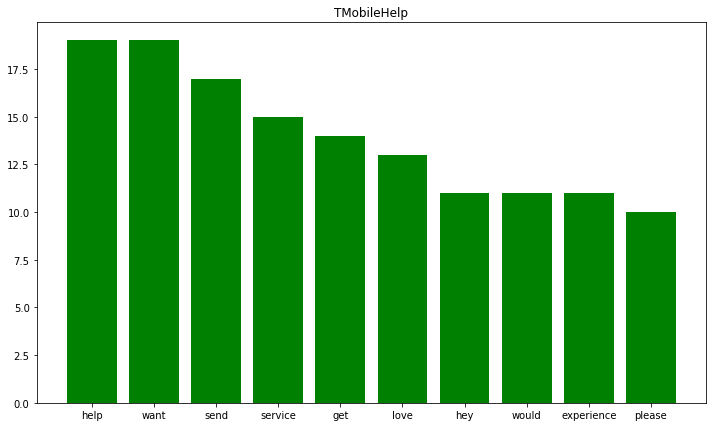

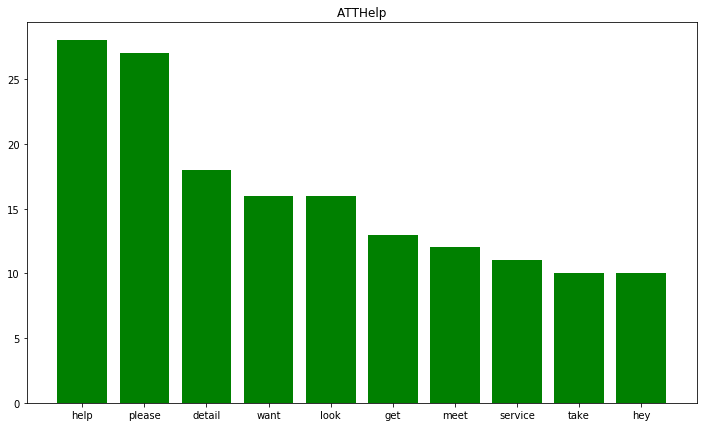

In [23]:
# –≥—Ä–∞—Ñ–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞

# fig, axs = plt.subplots(len(clean_df['carrier'].unique()), 1, figsize=(12, 7))
for i in clean_df['carrier'].unique():
    fig, axs = plt.subplots(1, 1, figsize=(12, 7))
    word_frequency_bar(clean_df,i)
    plt.title(i)

* –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ —Å–ª–æ–≤–∞–º, –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤

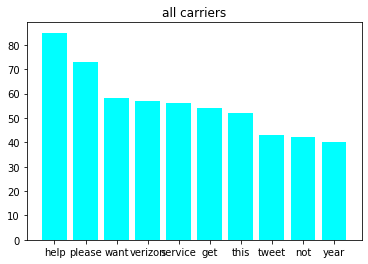

In [24]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª–æ–≤ –ø–æ –≤—Å–µ–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º 

all_text = []
for s in  clean_df['clean_text']:
    for j in s.split():
            all_text.append(j)

total_term_frequency = Counter(all_text)
word_dist = {}
for word, freq in total_term_frequency.most_common(10):
    word_dist[word] = freq
#         print ("{}\t{}".format(word, freq))
    plt.bar(word_dist.keys(), word_dist.values(), color='cyan')
    plt.title('all carriers')

In [45]:
# pip install WordCloud

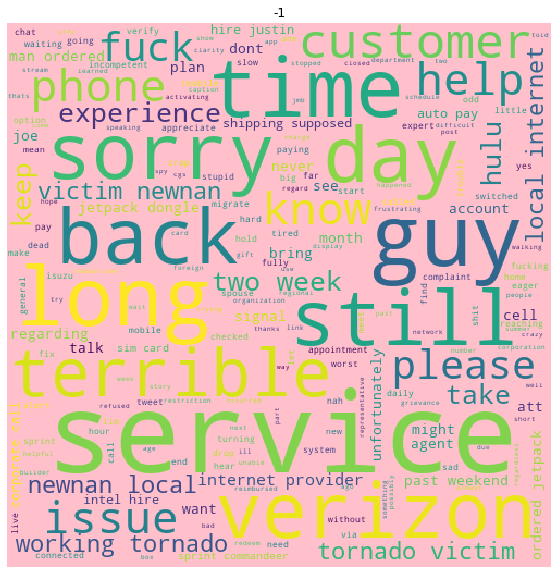

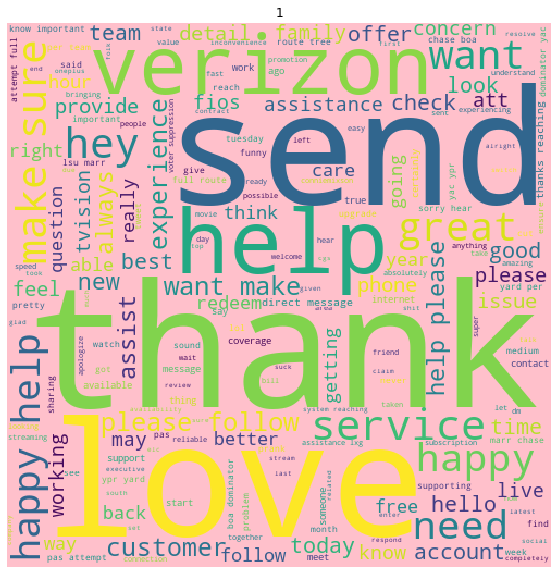

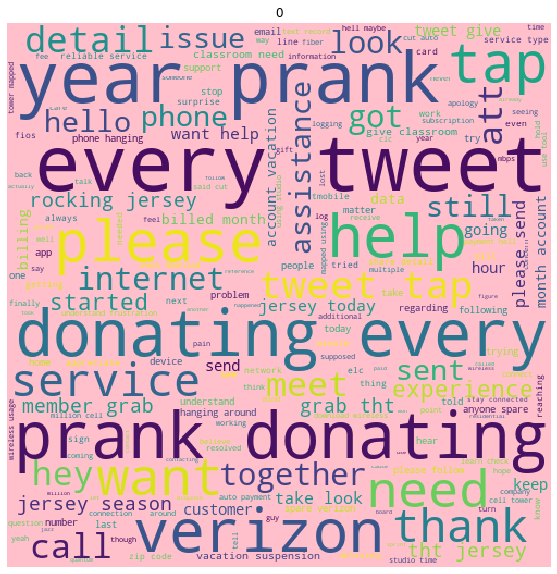

In [41]:
# https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");

for sense in clean_df['sense_dummy'].unique():
    text = ''
    for t in clean_df[clean_df['sense_dummy'] == sense]['clean_text']:
        text+=t+' '
    wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(text)
    plot_cloud(wordcloud)
    plt.title(sense)
    


      


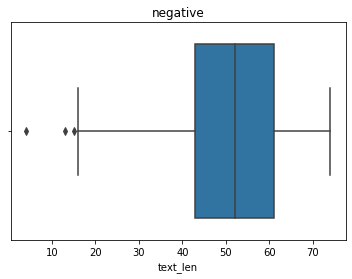

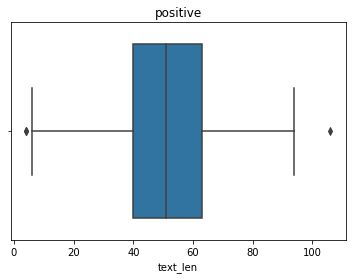

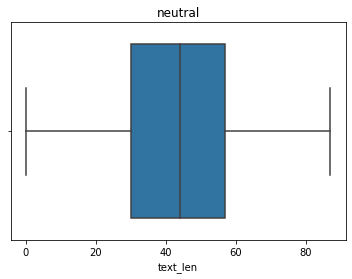

In [25]:
# –±–æ–∫—Å–ø–ª–æ—Ç—ã –¥–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞

for i in clean_df['sense_dummy'].unique():
    plt.figure()
    if i == 1:
        sns.boxplot(clean_df[clean_df['sense_dummy'] == i]['text_len']).set_title('positive')
    elif i == 0:
        sns.boxplot(clean_df[clean_df['sense_dummy'] == i]['text_len']).set_title('neutral')
    else:
        sns.boxplot(clean_df[clean_df['sense_dummy'] == i]['text_len']).set_title('negative')



###  –í–æ–ø—Ä–æ—Å 5 . –ó–∞—á–µ–º 2 –ø—É–Ω–∫—Ç–∞ –Ω–∏–∂–µ?
 * –ø—Ä–æ–ø–æ–±—É–π –Ω–∞–π—Ç–∏ —Å–ª–æ–≤–∞: –ø–æ–º–æ–≥–∏—Ç–µ, –±–µ—Å–ø–ª–∞—Ç–Ω–æ, –æ–±–µ—â–∞–ª–∏, –ø–æ–∫—É–ø–∞—Ç–µ–ª—å, –æ—á–µ–Ω—å –º–µ–¥–ª–µ–Ω–Ω–æ

 * –¥–æ–±–∞–≤—å —Å–≤–æ–∏ —Å–ª–æ–≤–∞ ( –∫ –≤—ã—à–µ–ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º) –∏ —Å–¥–µ–ª–∞–π —Ç–æ–ø-20

In [26]:
# –ø–æ–¥—Å—á–µ—Ç  —É–∫–∞–∑–∞–Ω–Ω—ã—Ö —Å–ª–æ–≤

churny_words = ['help','for free','promised','buyer','very slow','switch','change','leave','stay with','bye-bye','can\'t take','horrible','loyal','awful','worth','numbered','contract is up','goodbye','turn','lost']
from collections import defaultdict
churny_words_counter = defaultdict(int)

for word in churny_words:
    for i in clean_df['clean_text']:
        if word in i:
            churny_words_counter[word]+=1
            
churny_words_counter

defaultdict(int,
            {'help': 83,
             'switch': 6,
             'change': 6,
             'leave': 1,
             'loyal': 3,
             'turn': 9,
             'lost': 3})

### –û–ø—Ä–µ–¥–µ–ª–∏ –≤—Ä–µ–º—è –∏ –∫–∞–∫ –≤—Ä–µ–º—è —Å–æ–æ–±—â–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –ø–æ –≤—Ä–µ–º–µ–Ω–∏

* –æ–ø—Ä–µ–¥–µ–ª–∏ –º–µ—Å—è—Ü, –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏, –¥–µ–Ω—å –º–µ—Å—è—Ü–∞, –≤—Ä–µ–º—è –¥–Ω—è, —á–∞—Å—Ç—å –¥–Ω—è (–¥–æ –æ–±–µ–¥–∞, –¥–µ–Ω—å, –≤–µ—á–µ—Ä - –Ω–∞–ø—Ä–∏–º–µ—Ä)

In [27]:
# –¥–æ–±–∞–≤–∏–º 2 —Å—Ç–æ–ª–±—Ü–∞ : –¥–µ–Ω—å –º–µ—Å—è—Ü–∞ –∏ —á–∞—Å—Ç—å –¥–Ω—è
clean_df['day_of_month'] = clean_df['date_time'].dt.day
clean_df['part_of_day'] = clean_df['hour'].apply(lambda x: 'night' if 0<x<5 else ('morning' if 6<x<10 else ('day' if 11<x<18 else "evening") ))



(array([  0.,   0.,   0.,   0.,   0., 649.,   0.,   0.,   0.,   0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

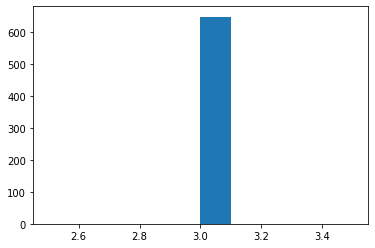

In [28]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –º–µ—Å—è—Ü–∞–º
plt.hist(clean_df['month'])

(array([  0.,   0.,   0.,   0.,   0., 649.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

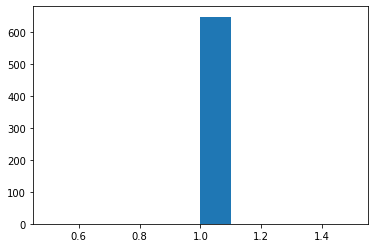

In [29]:
# –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏
plt.hist(clean_df['day'])

(array([  0.,   0.,   0.,   0.,   0., 649.,   0.,   0.,   0.,   0.]),
 array([29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5]),
 <a list of 10 Patch objects>)

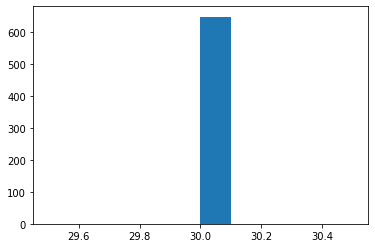

In [30]:
# –ø–æ —á–∏—Å–ª—É –º–µ—Å—è—Ü–∞
plt.hist(clean_df['day_of_month'])

(array([  0.,   0.,   0.,   0.,   0., 649.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

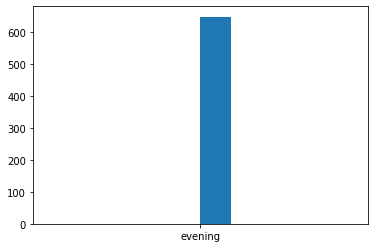

In [31]:
# –ø–æ –ø–µ—Ä–∏–æ–¥—É –¥–Ω—è
plt.hist(clean_df['part_of_day'])

###  –í–æ–ø—Ä–æ—Å 5 .–∫–∞–∫–∞—è –ª–æ–≥–∏–∫–∞ —Ñ–æ—Ä–º—É–ª—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è sin cosine - —ç—Ç–æ –ø–µ—Ä–µ–≤–æ–¥ –≤ —Ä–∞–¥–∏–∞–Ω—ã? —ç—Ç–æ –ø–æ—Ç–æ–º –ø–æ–π–¥–µ—Ç –≤ –º–æ–¥–µ–ª—å

In [32]:
# –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö
import numpy as np

seconds_in_day = 24*60*60
clean_df['seconds']= clean_df['date_time'].dt.second
clean_df['sin_time'] = np.sin(2*np.pi*clean_df.seconds/seconds_in_day)
clean_df['cos_time'] = np.cos(2*np.pi*clean_df.seconds/seconds_in_day)

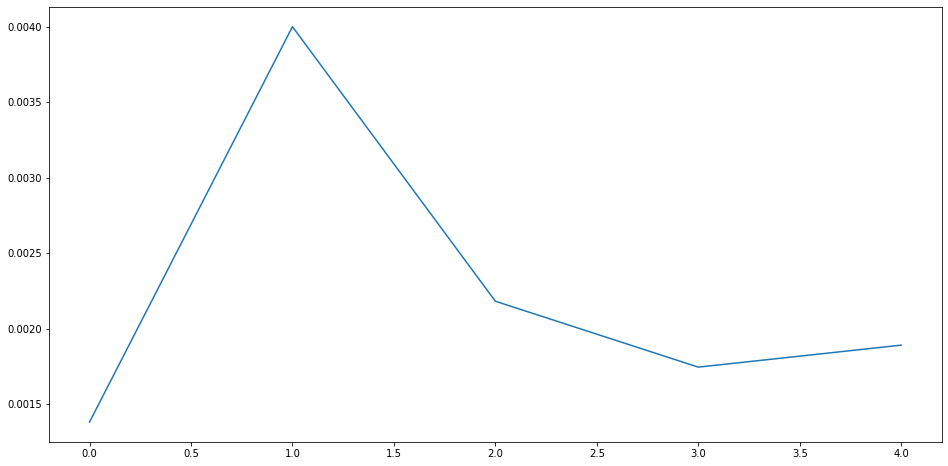

In [33]:
clean_df.sin_time.head(5).plot(figsize = (16,8))

### –°–¥–µ–ª–∞–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –æ–±–∑–æ—Ä –ø–æ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–Ω–æ–º—É –∞–Ω–∞–ª–∏–∑—É –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤

In [34]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–æ–≤ –ø–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º

from statsmodels.api import stats
df_conflux = clean_df[['carrier','sense_dummy']]
table1 = stats.Table.from_data(df_conflux)
df_conflux = pd.DataFrame(table1.table_orig)
# for i in df_conflux.columns:
#     print(type(i))
#     print(i)
df_conflux['neg %'] = df_conflux[-1]/(df_conflux[-1]+df_conflux[1]+df_conflux[0])
df_conflux['pos %'] = df_conflux[1]/(df_conflux[-1]+df_conflux[1]+df_conflux[0])
df_conflux['neu %'] = df_conflux[0]/(df_conflux[-1]+df_conflux[1]+df_conflux[0])
df_conflux

sense_dummy     -1   0   1     neg %     pos %     neu %
carrier                                                 
ATT             10  51  32  0.107527  0.344086  0.548387
ATTHelp         11  63  24  0.112245  0.244898  0.642857
TMobile          4  68  24  0.041667  0.250000  0.708333
TMobileHelp     23  24  63  0.209091  0.572727  0.218182
VZWSupport      19  36  41  0.197917  0.427083  0.375000
VerizonSupport  15  35  38  0.170455  0.431818  0.397727
verizon          9  41  18  0.132353  0.264706  0.602941

In [35]:
clean_df.to_csv('clean_df.csv')


### –°–æ–∑–¥–∞–Ω–∏–µ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω–æ–≥–æ —Å–ª–æ–≤–∞—Ä—è –¥–ª—è –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã –∏ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö —Ç–≤–∏—Ç–æ–≤

In [36]:
# —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –æ—á–∏—â–µ–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞

# https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

from nltk.tokenize import RegexpTokenizer



clean_df["tokens"] = clean_df["clean_text"].apply(tokenizer.tokenize)
all_words = [word for tokens in clean_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

4776 words total, with a vocabulary size of 1414
Max sentence length is 15


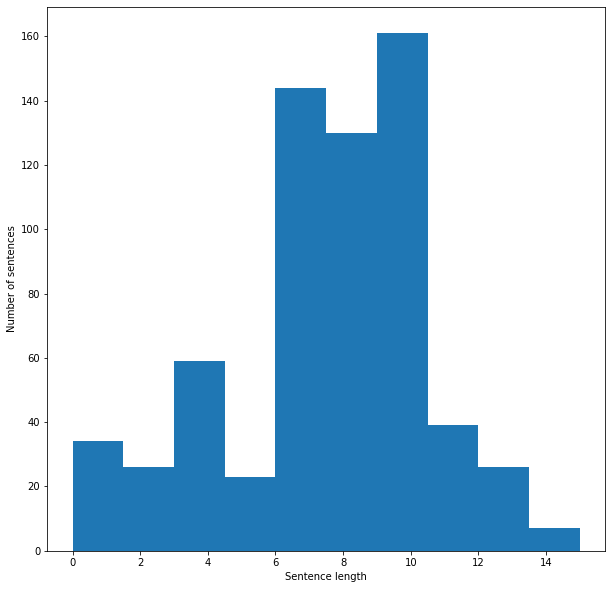

In [37]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –ø–æ –¥–ª–∏–Ω–µ
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [38]:
# Bag of words
# https://habr.com/ru/company/Voximplant/blog/446738/

# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(clean_df['clean_text'])

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)


able  absolutely  acce  access  account  across  acting  activating  \
0       0           0     0       0        0       0       0           0   
1       0           0     0       0        0       0       0           0   
2       0           0     0       0        0       0       0           0   
3       0           0     0       0        0       0       0           0   
4       0           0     0       0        0       0       0           0   
..    ...         ...   ...     ...      ...     ...     ...         ...   
644     0           0     0       0        0       0       0           0   
645     0           0     0       0        0       0       0           0   
646     0           0     0       0        0       0       0           0   
647     0           0     0       0        0       0       0           0   
648     0           0     0       0        0       0       0           0   

     active  actually  ...  yikes  you  your  yours  youtube  ypr  yr  zip  \
0         0         0  ...      0    0     0      0        0    0   0    0   
1         0         0  ...      0    0     0      0        0    0   0    0   
2         0         0  ...      0    0     0      0        0    0   0    0   
3         0         0  ...      0    0     0      0        0    0   0    0   
4         0         0  ...      0    0     0      0        0    0   0    0   
..      ...       ...  ...    ...  ...   ...    ...      ...  ...  ..  ...   
644       0         0  ...      0    0     0      0        0    0   0    0   
645       0         0  ...      0    0     0      0        0    0   0    0   
646       0         0  ...      0    0     0      0        0    0   0    0   
647       0         0  ...      0    0     0      0        0    0   0    0   
648       0         0  ...      0    0     0      0        0    0   0    0   

     ùêãùêÑùêÄùêÉùêÑùêë  ùêìùêáùêÑ  
0         0    0  
1         0    0  
2         0    0  
3         0    0  
4         0    0  
..      ...  ...  
644       0    0  
645       0    0  
646       0    0  
647       0    0  
648       0    0  

[649 rows x 1413 columns]

In [39]:
# —Ç–æ–ø-10 —Å–ª–æ–≤
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(clean_df.clean_text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)

0
help     85
please   73
want     58
verizon  57
service  56
get      54
tweet    43
year     40
need     40
prank    40

In [40]:
# —Ç–æ–ø-10 –±–∏–≥—Ä–∞–º–º
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(clean_df.clean_text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)

0
every tweet     36
donating every  30
prank donating  30
tap year        30
year prank      30
please follow   19
help please     18
make sure       16
happy help      13
want make       13

In [42]:
sense_dict = {}
for sense in clean_df['sense_dummy'].unique():
    print(sense)
    text = ''
    for i in clean_df[clean_df['sense_dummy'] == sense]['clean_text'].values:
#         print(i)
        text+=i+''
        sense_dict[sense] = text.split()
freq_dist_positive=nltk.FreqDist(sense_dict[1])
freq_dist_negative=nltk.FreqDist(sense_dict[-1])
print("Most Common Positive Words : ",freq_dist_positive.most_common(20))
print("Most Common Negative Words : ",freq_dist_negative.most_common(20))      

-1
1
0
Most Common Positive Words :  [('help', 39), ('please', 32), ('send', 22), ('happy', 18), ('want', 18), ('make', 18), ('follow', 17), ('get', 17), ('sure', 16), ('love', 16), ('verizon', 15), ('service', 15), ('need', 14), ('thanks', 14), ('would', 13), ('message', 11), ('customer', 11), ('experience', 10), ('team', 10), ('new', 10)]
Most Common Negative Words :  [('service', 17), ('guy', 8), ('back', 7), ('long', 7), ('day', 6), ('verizon', 6), ('internet', 6), ('time', 6), ('issue', 5), ('week', 5), ('get', 5), ('two', 5), ('still', 5), ('sprint', 5), ('have', 4), ('past', 4), ('pay', 4), ('you', 4), ('terrible', 4), ('please', 4)]


In [43]:
# https://github.com/Ashwani018/Amazon-Fine-Food-Reviews/blob/master/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb

count_vect = CountVectorizer(ngram_range=(1,2) ) #in scikit-learn
final_bigram_counts = count_vect.fit_transform(clean_df['clean_text'].values)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (649, 4309)
the number of unique words including both unigrams and bigrams  4309


#### TF-IDF

In [44]:
# https://github.com/Ashwani018/Amazon-Fine-Food-Reviews/blob/master/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(clean_df['clean_text'].values)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (649, 4309)
the number of unique words including both unigrams and bigrams  4309


In [45]:
features = tf_idf_vect.get_feature_names()
print("some sample features(unique words in the corpus)",features[4102:4110])

some sample features(unique words in the corpus) ['wayne batman', 'web', 'week', 'week able', 'week and', 'week get', 'week got', 'week later']


In [46]:
# —Ç–æ–ø-25 –∑–Ω–∞—á–∏–º—ã—Ö –ø–æ tf-idf —Å–ª–æ–≤ –∏ –±–∏–≥—Ä–∞–º–º

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,25)
top_tfidf

feature     tfidf
0              could due  0.275574
1   regional restriction  0.275574
2           have checked  0.275574
3            checked cgs  0.275574
4             this could  0.275574
5           due regional  0.275574
6       restriction have  0.275574
7            restriction  0.275574
8               regional  0.275574
9                checked  0.259103
10                   due  0.247417
11                   cgs  0.247417
12                  have  0.230946
13                 could  0.230946
14                  this  0.142449
15       global pandemic  0.000000
16             goal make  0.000000
17        gmail explaine  0.000000
18          goal provide  0.000000
19                   god  0.000000
20                 gmail  0.000000
21               god vpn  0.000000
22                  goal  0.000000
23            ùêìùêáùêÑ ùêãùêÑùêÄùêÉùêÑùêë  0.000000
24                global  0.000000

In [311]:
# unknown word?????

# import tqdm
# words = pd.read_table('https://raw.githubusercontent.com/dwyl/english-words/master/words.txt')
# words.columns=['word']
# non_list = {}
# for sent in tqdm.tqdm(clean_df.clean_text.str.split().values):
#     for token in sent:
#         if token not in words:
#               non_list[token] = 1 if token not in non_list else non_list[token]+1
# pd.Series(non_list).sort_values(ascending=False).head(30)


### Method2: Get representative words by Topic Modeling¬∂

In [323]:
# pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
Note: you may need to restart the kernel to use updated packages.


In [107]:
# –≤—ã–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–ø–∏–∫–æ–≤ –ø–æ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞–º
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

# # –¥–ª—è –º–µ—Ç–æ–¥–∞ Topic Modeling –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LdaMulticore
from gensim.models import TfidfModel
import nltk
for sense in clean_df['sense_dummy'].unique():
    pos = []
    for i in clean_df[clean_df['sense_dummy'] == sense]['tokens'].values:
        pos.append(i)
        
    dic=Dictionary(pos)
    bow_corpus = [dic.doc2bow(doc) for doc in pos]
    lda_model = LdaMulticore(bow_corpus, 
                                           num_topics = 4, 
                                           id2word = dic,                                    
                                           passes = 10,
                                           workers = 2)
    print('pos' if sense== 1 else  ('neg' if sense == -1 else 'neu'))
    print(lda_model.show_topics())
    

C:\Users\au00174\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\au00174\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


neg
[(0, '0.024*"guy" + 0.016*"verizon" + 0.016*"time" + 0.015*"issue" + 0.015*"long" + 0.012*"sprint" + 0.012*"back" + 0.012*"hire" + 0.012*"intel" + 0.012*"bring"'), (1, '0.024*"internet" + 0.020*"phone" + 0.017*"sorry" + 0.017*"get" + 0.017*"victim" + 0.017*"provider" + 0.017*"tornado" + 0.017*"newnan" + 0.017*"working" + 0.017*"local"'), (2, '0.025*"service" + 0.014*"customer" + 0.011*"terrible" + 0.009*"day" + 0.009*"hulu" + 0.009*"card" + 0.009*"past" + 0.009*"sim" + 0.009*"weekend" + 0.009*"shipping"'), (3, '0.025*"service" + 0.021*"week" + 0.017*"and" + 0.017*"fuck" + 0.017*"two" + 0.013*"call" + 0.013*"time" + 0.013*"have" + 0.013*"back" + 0.013*"still"')]
pos
[(0, '0.014*"good" + 0.013*"want" + 0.012*"thanks" + 0.011*"service" + 0.011*"verizon" + 0.009*"phone" + 0.009*"make" + 0.007*"new" + 0.007*"say" + 0.007*"internet"'), (1, '0.015*"hey" + 0.013*"thanks" + 0.010*"best" + 0.010*"love" + 0.010*"great" + 0.010*"service" + 0.009*"would" + 0.009*"experience" + 0.008*"reaching" 

In [108]:
# –ø–æ–ø—ã—Ç–∫–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
import pyLDAvis


pyLDAvis.enable_notebook()
vis = pyLDAvis.prepare(lda_model, bow_corpus, dic)
vis

TypeError: prepare() missing 2 required positional arguments: 'vocab' and 'term_frequency'

In [65]:
pip install --user gensim

Note: you may need to restart the kernel to use updated packages.


In [317]:
# –æ–±—â–∏–µ —Ç–æ–ø–∏–∫–∏ –ø–æ –≤—Å–µ–º—É –∫–æ—Ä–ø—É—Å—É

# https://dair.ai/Exploratory_Data_Analysis_for_Text_Data/


from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer(stop_words=stops)
model = vectorizer.fit(clean_df.clean_text)
docs = vectorizer.transform(clean_df.clean_text)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
        for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda,vectorizer.get_feature_names(),10)

Topic #0: call week service fuck still last verizon two issue cell
Topic #1: verizon phone get call billing around anyone hanging spare wireless
Topic #2: reaching hear service still check try issue please thanks appreciate
Topic #3: please detail thank want help service send get family share
Topic #4: tweet prank every tap year donating give need classroom thanks
Topic #5: get started know code follow customer please want month taken
Topic #6: help get need following new problem getting paid tvision finally
Topic #7: verizon pas card gift att one good time fios left
Topic #8: account month love would someone suspension vacation billed help long
Topic #9: internet use working getting want need experience keep local tool
Topic #10: verizon team full per pas yard lsu yac tree boa
Topic #11: back meet phone wait alexisdean replied always please hour thanks
Topic #12: att service day need issue supposed hello phone support guy
Topic #13: jersey today member season rocking tht grab network 

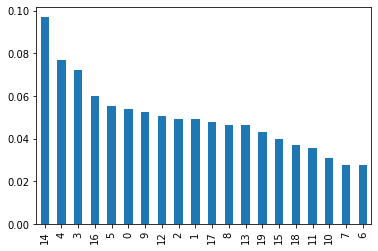

In [319]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç–æ–ø–∏–∫–æ–≤

clean_df['topic']=lda.transform(docs).argmax(axis=1)
clean_df.topic.value_counts(normalize=True).plot.bar()

In [320]:


# for i in range(10):
#     temp = clean_df[clean_df.topic==i]
#     temp.resample('7D').size().plot()
#     plt.title('topic %s' %i)
#     plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

### Named entity recognition

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [102]:
#  pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl

In [47]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [99]:
# doc=nlp('India and Iran have agreed to boost the economic viability \
# of the strategic Chabahar port through various measures, \
# including larger subsidies to merchant shipping firms using the facility, \
# people familiar with the development said on Thursday.')

# [(x.text,x.label_) for x in doc.ents]
# from spacy import displacy

# displacy.render(doc, style='ent')

In [51]:
# —Å–æ–∑–¥–∞–Ω–∏–µ –∫–æ—Ä–ø—É—Å–æ–≤ –ø–æ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞–º

# pos_text = ''
# neg_text = ''
# neu_text = ''
# for i in clean_df['sense_dummy'].unique():
    
#     for text in clean_df[clean_df['sense_dummy'] == i]['clean_text']:
#         if i == -1:
#             neg_text+=text+' '
#         elif i == 0:
#             neu_text+=text+' '
#         else:
#             pos_text+=text+' '
            

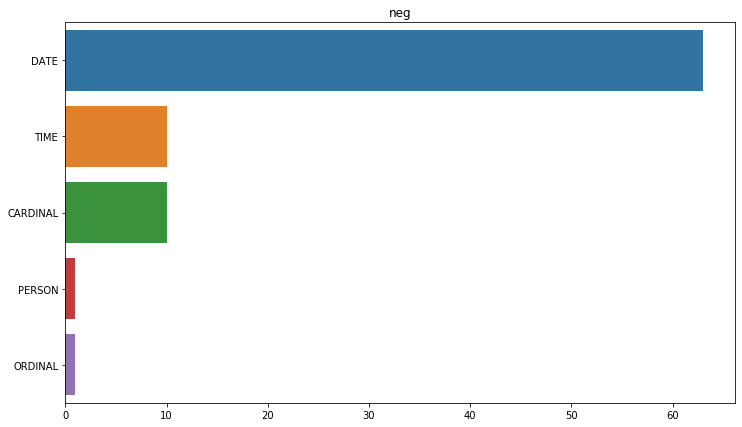

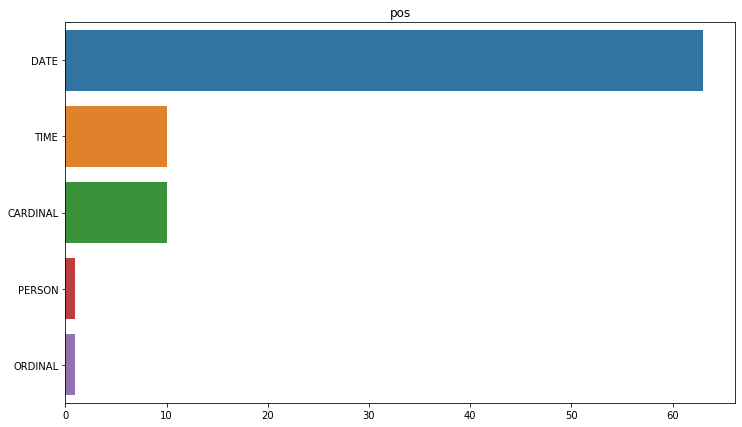

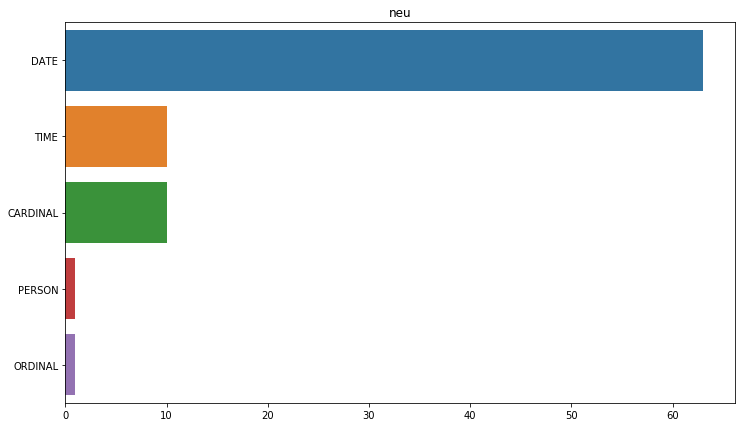

In [64]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ entity –ø–æ —Å–µ–Ω–∏—Ç–º–µ–Ω—Ç–∞–º

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]
for sense in clean_df['sense_dummy'].unique():
    ent=clean_df[clean_df['sense_dummy'] == i]['clean_text'].apply(lambda x : ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    fig, axs = plt.subplots(1, 1, figsize=(12, 7))
    x,y=map(list,zip(*count))
#     print('pos' if sense== 1 else  ('neg' if sense == -1 else 'neu'))
    sns.barplot(x=y,y=x).set_title('pos' if sense== 1 else  ('neg' if sense == -1 else 'neu'))


https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
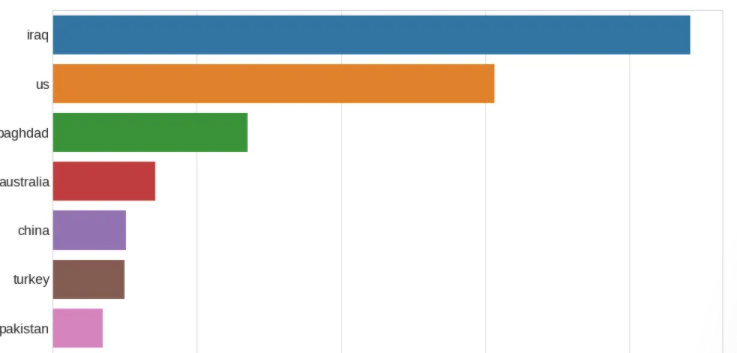

### Exploration through parts of speach tagging in Python

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [103]:
# nltk.download('averaged_perceptron_tagger')

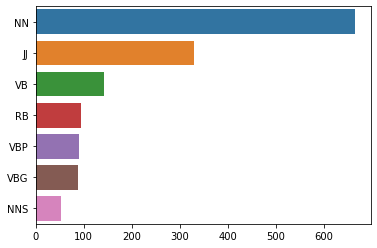

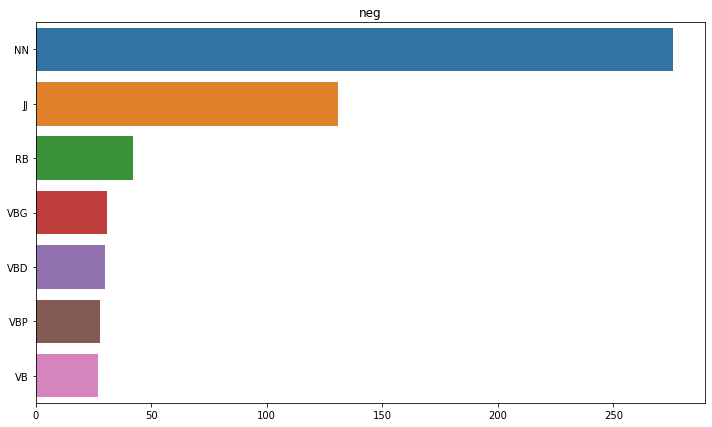

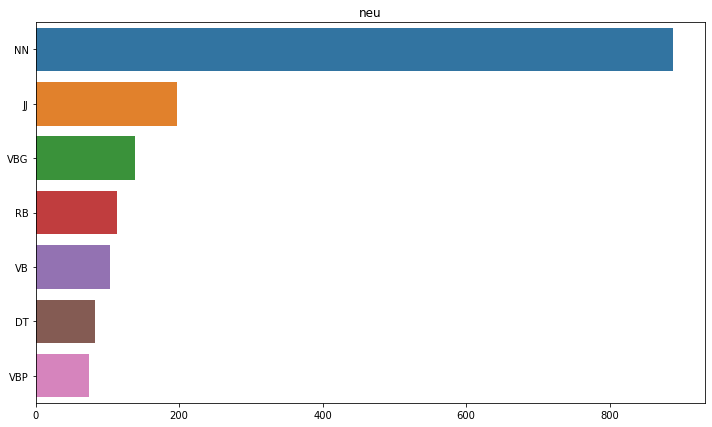

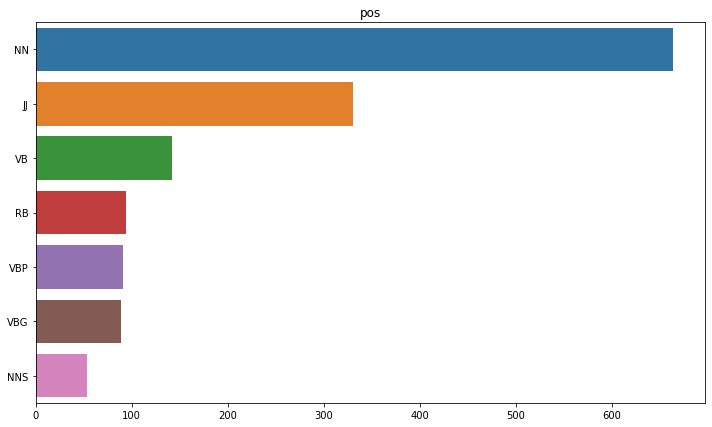

In [94]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —á–∞—Å—Ç—è–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è

def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

# tags=news['headline_text'].apply(lambda x : pos(x))
# tags=[x for l in tags for x in l]
# counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)
for sense in range(-1,2):
#     print(i)
    tags = [i[1] for i in nltk.pos_tag(sense_dict[sense])]
    freq_dist_positive=nltk.FreqDist(tags)
#     print("Most Common Positive Words : ",freq_dist_positive.most_common(20))
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    fig, axs = plt.subplots(1, 1, figsize=(12, 7))
    sns.barplot(x=y,y=x).set_title('pos' if sense== 1 else  ('neg' if sense == -1 else 'neu'))

In [105]:
# doc = nlp('The greatest comeback stories in 2019')
# displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

### Exploring through text complexity
https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

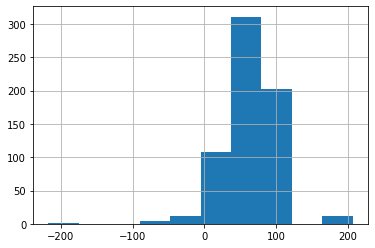

In [97]:

from textstat import flesch_reading_ease

clean_df['clean_text'].apply(lambda x : flesch_reading_ease(x)).hist()

In [98]:
# pip install textstat

###  –í–æ–ø—Ä–æ—Å –ì–õ–ê–í–ù–´–ô - –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ª–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω EDA, –µ—Å—Ç—å –ª–∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏, —á—Ç–æ –¥–æ–±–∞–≤–∏—Ç—å –∏ –∫–∞–∫ –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å? 